# Libraries

In [1]:
# Importing Libraries
import numpy as np
import pandas as pd
import matplotlib
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow import keras
import seaborn as sns
from sklearn.metrics import accuracy_score, confusion_matrix, precision_score, recall_score, f1_score, classification_report
%load_ext autotime  # Print out time per cell execution

# Importing Datasets

In [3]:
# path to local data directory
data_dir = '/Users/air/Desktop/FinalProject/Data'

# Training data
X_rot_train = np.load(f'{data_dir}/X_rot_train.npy')
y_rot_train = np.load(f'{data_dir}/y_rot_train.npy')
# Validation Data
X_rot_val = np.load(f'{data_dir}/X_rot_val.npy')
y_rot_val = np.load(f'{data_dir}/y_rot_val.npy')


time: 1.85 s (started: 2023-07-28 09:30:26 +02:00)


# Model

In [4]:
# Creating  CNN
model = keras.models.Sequential([
        keras.layers.Conv2D(64, 7, activation="relu", padding="same",
                            input_shape=[32, 32, 3]),
        keras.layers.MaxPooling2D(2),
        keras.layers.Conv2D(128, 3, activation="relu", padding="same"),
        keras.layers.Conv2D(128, 3, activation="relu", padding="same"),
        keras.layers.MaxPooling2D(2),
        keras.layers.Conv2D(256, 3, activation="relu", padding="same"),
        keras.layers.Conv2D(256, 3, activation="relu", padding="same"),
        keras.layers.MaxPooling2D(2),
        keras.layers.Flatten(),
        keras.layers.Dense(128, activation="relu"),
        keras.layers.Dropout(0.5),
        keras.layers.Dense(64, activation="relu"),
        keras.layers.Dropout(0.5),
        keras.layers.Dense(4, activation="softmax")
])

time: 381 ms (started: 2023-07-28 09:30:27 +02:00)


## Compiling Model

In [5]:
# Compiling the model
model.compile(
    loss="sparse_categorical_crossentropy",
    optimizer="sgd",
    metrics=["accuracy"])

time: 5.49 ms (started: 2023-07-28 09:30:28 +02:00)


In [6]:
# Set True for debug, false for performance
tf.config.run_functions_eagerly(False)

time: 365 µs (started: 2023-07-28 09:30:28 +02:00)


# Training

In [7]:
# Training the model on Pretext Task
history = model.fit(X_rot_train, y_rot_train, epochs=15, validation_data=(X_rot_val, y_rot_val))

Epoch 1/15


2023-07-28 09:30:29.848237: W tensorflow/tsl/platform/profile_utils/cpu_utils.cc:128] Failed to get CPU frequency: 0 Hz


4688/4688 [==============================] - 429s 91ms/step - loss: 1.2231 - accuracy: 0.4333 - val_loss: 1.1054 - val_accuracy: 0.5098
Epoch 2/15
4688/4688 [==============================] - 437s 93ms/step - loss: 1.1051 - accuracy: 0.5053 - val_loss: 1.0466 - val_accuracy: 0.5256
Epoch 3/15
4688/4688 [==============================] - 438s 93ms/step - loss: 1.0556 - accuracy: 0.5435 - val_loss: 0.9746 - val_accuracy: 0.5974
Epoch 4/15
4688/4688 [==============================] - 439s 94ms/step - loss: 0.9893 - accuracy: 0.5915 - val_loss: 0.9365 - val_accuracy: 0.6195
Epoch 5/15
4688/4688 [==============================] - 438s 94ms/step - loss: 0.9462 - accuracy: 0.6134 - val_loss: 0.9192 - val_accuracy: 0.6235
Epoch 6/15
4688/4688 [==============================] - 439s 94ms/step - loss: 0.9079 - accuracy: 0.6349 - val_loss: 0.8752 - val_accuracy: 0.6462
Epoch 7/15
4688/4688 [==============================] - 439s 94ms/step - loss: 0.8723 - accuracy: 0.6525 - val_loss: 0.8274 - val

# Model Summary

In [9]:
# Checking the Model Architecture
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 32, 32, 64)        9472      
                                                                 
 max_pooling2d (MaxPooling2D  (None, 16, 16, 64)       0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 16, 16, 128)       73856     
                                                                 
 conv2d_2 (Conv2D)           (None, 16, 16, 128)       147584    
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 8, 8, 128)        0         
 2D)                                                             
                                                                 
 conv2d_3 (Conv2D)           (None, 8, 8, 256)         2

# Metrics

In [10]:
from sklearn.metrics import accuracy_score, confusion_matrix, precision_score, recall_score, f1_score, classification_report

# Predict the rotation of the validation set
y_rot_val_pred = model.predict(X_rot_val).argmax(axis=1)  # Returns the indices of the maximum values along an axis

# Accuracy
accuracy = accuracy_score(y_rot_val, y_rot_val_pred)
print(f"Accuracy: {accuracy}")

# Confusion Matrix
conf_matrix = confusion_matrix(y_rot_val, y_rot_val_pred)
print(f"Confusion Matrix:\n {conf_matrix}")

# Precision, Recall, F1-score with 'macro' average
precision_macro = precision_score(y_rot_val, y_rot_val_pred, average='macro')
recall_macro = recall_score(y_rot_val, y_rot_val_pred, average='macro')
f1_macro = f1_score(y_rot_val, y_rot_val_pred, average='macro')
print(f"Macro Precision: {precision_macro}")
print(f"Macro Recall: {recall_macro}")
print(f"Macro F1-score: {f1_macro}")

# Precision, Recall, F1-score with 'micro' average
precision_micro = precision_score(y_rot_val, y_rot_val_pred, average='micro')
recall_micro = recall_score(y_rot_val, y_rot_val_pred, average='micro')
f1_micro = f1_score(y_rot_val, y_rot_val_pred, average='micro')
print(f"Micro Precision: {precision_micro}")
print(f"Micro Recall: {recall_micro}")
print(f"Micro F1-score: {f1_micro}")

# Classification Report
print("Classification Report:\n", classification_report(y_rot_val, y_rot_val_pred))


313/313 [==============================] - 9s 29ms/step
Accuracy: 0.7414
Confusion Matrix:
 [[1602  280  295  291]
 [  73 2023  156  329]
 [ 140  253 1806  242]
 [  74  309  144 1983]]
Macro Precision: 0.7508437135923078
Macro Recall: 0.740703467565375
Macro F1-score: 0.7412219872573915
Micro Precision: 0.7414
Micro Recall: 0.7414
Micro F1-score: 0.7414
Classification Report:
               precision    recall  f1-score   support

           0       0.85      0.65      0.74      2468
           1       0.71      0.78      0.74      2581
           2       0.75      0.74      0.75      2441
           3       0.70      0.79      0.74      2510

    accuracy                           0.74     10000
   macro avg       0.75      0.74      0.74     10000
weighted avg       0.75      0.74      0.74     10000

time: 9.45 s (started: 2023-07-28 11:21:01 +02:00)


## Confusion Matrix

313/313 [==============================] - 9s 30ms/step
Accuracy: 0.7414



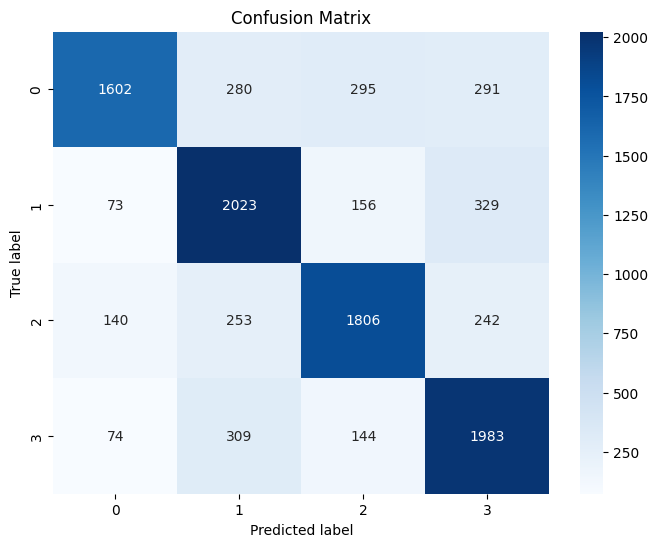

            Metric     Score
0  Macro Precision  0.750844
1     Macro Recall  0.740703
2   Macro F1-score  0.741222
3  Micro Precision  0.741400
4     Micro Recall  0.741400
5   Micro F1-score  0.741400
time: 9.52 s (started: 2023-07-28 11:21:11 +02:00)


In [11]:

# Predict the rotation of the validation set
y_rot_val_pred = model.predict(X_rot_val).argmax(axis=1)

# Accuracy
accuracy = accuracy_score(y_rot_val, y_rot_val_pred)
print(f"Accuracy: {accuracy}\n")

# Confusion Matrix
conf_matrix = confusion_matrix(y_rot_val, y_rot_val_pred)

plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicted label')
plt.ylabel('True label')
plt.title('Confusion Matrix')
plt.show()

# Precision, Recall, F1-score with 'macro' average
precision_macro = precision_score(y_rot_val, y_rot_val_pred, average='macro')
recall_macro = recall_score(y_rot_val, y_rot_val_pred, average='macro')
f1_macro = f1_score(y_rot_val, y_rot_val_pred, average='macro')

# Precision, Recall, F1-score with 'micro' average
precision_micro = precision_score(y_rot_val, y_rot_val_pred, average='micro')
recall_micro = recall_score(y_rot_val, y_rot_val_pred, average='micro')
f1_micro = f1_score(y_rot_val, y_rot_val_pred, average='micro')

# Create a DataFrame for the results
results = pd.DataFrame({
    'Metric': ['Macro Precision', 'Macro Recall', 'Macro F1-score', 'Micro Precision', 'Micro Recall', 'Micro F1-score'],
    'Score': [precision_macro, recall_macro, f1_macro, precision_micro, recall_micro, f1_micro]
})

print(results)


## Plotting Training and Validation Loss

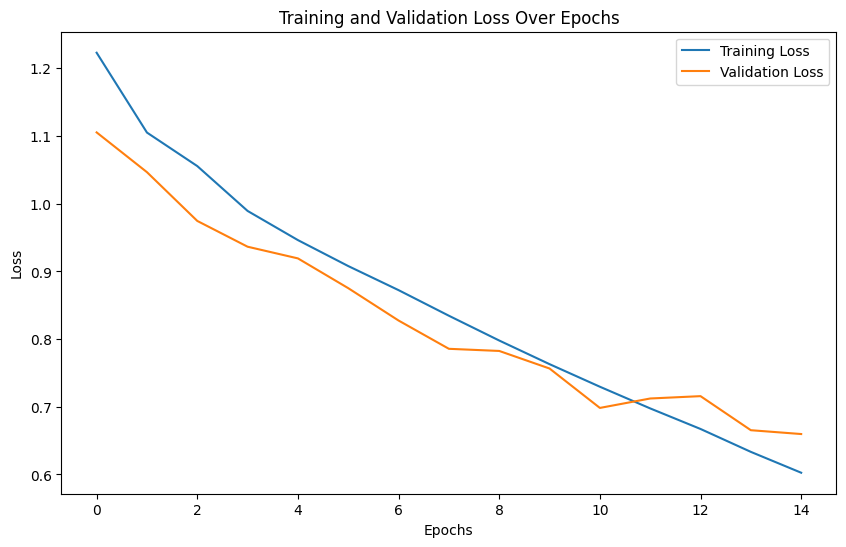

time: 92.4 ms (started: 2023-07-28 11:21:20 +02:00)


In [12]:
# Plotting the training and validation loss
plt.figure(figsize=(10, 6))
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Training and Validation Loss Over Epochs')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()


# Saving the Model

In [8]:
#Save the model
model.save('/Users/air/Desktop/FinalProject/Models/Model.h5')


time: 38.8 ms (started: 2023-07-28 11:21:01 +02:00)
